# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Studentname

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [181]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [182]:
# Import libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy.random as nr
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [183]:
# Import data into data frame.
autoData = pd.read_csv(fileName)
# Convert to numeric , the numeric columns.
numericCol = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
              'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
for column in numericCol:
    autoData[column] = pd.to_numeric(autoData[column], errors = 'coerce')
autoData.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


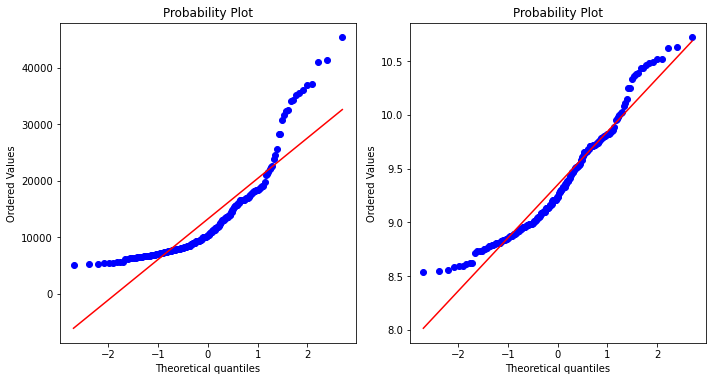

In [184]:
# 1) q-q plot of price and log price 
def qq_plot(vec1, vec2):
    import scipy.stats as ss
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ax1.set_ylabel('Price')
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ax1.set_ylabel('Log Price')
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    plt.tight_layout()

numPrice = autoData['price'].dropna()
qq_plot(numPrice, np.log(numPrice))  

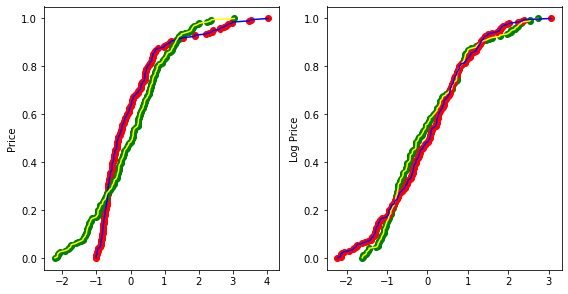

In [185]:
# 2) K-S test of price and log price w.r.t std normal distribution.
#We will standardize the data before comparing with std.normal distribution.

def plot_cums(dist1, dist2, dist3):
    plt.figure(figsize=(8, 8)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ## sort the 3 data samples
    data_sorted1 = np.sort(dist1)
    data_sorted2 = np.sort(dist2)
    data_sorted3 = np.sort(dist3)
    # calculate the proportional values of samples
    p1 = 1. * np.arange(len(dist1)) / (len(dist1) - 1)
    p2 = 1. * np.arange(len(dist2)) / (len(dist2) - 1)
    # Now plot as line and scatter plot for Dist 1 vs Std normal
    ax1.plot(data_sorted1, p1,color = 'blue')
    ax1.scatter(data_sorted1, p1, color = 'red')
    ax1.plot(data_sorted3, p1, color = 'yellow')
    ax1.scatter(data_sorted3, p1, color = 'green')
    # Now plot as line and scatter plot for Dist 2 vs Std normal
    ax2.plot(data_sorted2, p2, color = 'yellow')
    ax2.scatter(data_sorted2, p2, color = 'green')
    ax2.plot(data_sorted3, p2, color = 'blue')
    ax2.scatter(data_sorted3, p2, color = 'red')
    ax1.set_ylabel('Price')
    ax2.set_ylabel('Log Price')
    plt.tight_layout()


# Function to perform ks test
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))


norm1 = nr.normal(size = numPrice.count()).tolist() # Std normal distribution
normPrice = (numPrice - numPrice.mean()) / numPrice.std() # Normalized price
logPrice = np.log(numPrice , where = (numPrice > 0)) # Logarithms of price
normLogPrice = (logPrice - logPrice.mean())/logPrice.std() # Normalized log price
plot_cums(normPrice, normLogPrice, norm1) # Pass normalized price & normalized log price to plotting function



In [186]:
# Perform KS test for price & log price to compare with normal distribution
print( "\nKS statistic & P value for normalized price\n")
ks_test(normPrice)
print( "\nKS statistic & P value for normalized Log price\n")
ks_test(normLogPrice)


KS statistic & P value for normalized price

KS-statistic = 0.1543684067672082
P-value = 0.00011968718639773103

KS statistic & P value for normalized Log price

KS-statistic = 0.09755150950200159
P-value = 0.04070206828409906


### Inference from QQ Plot & KS test

1. Based on the Q-Q plots and the sample CDF plots as shown above , it is clear that the distribution of log price is more closer to normal then just price. 
2. Based on the KS test , we get a much higher P-value & a much lower Ks- statistic when log price is used.Although both distributions are not normal , the log -price is much closer to normal.( We won't be able to reject the null hypothesis that the both distributions are same , for a highe rp value.

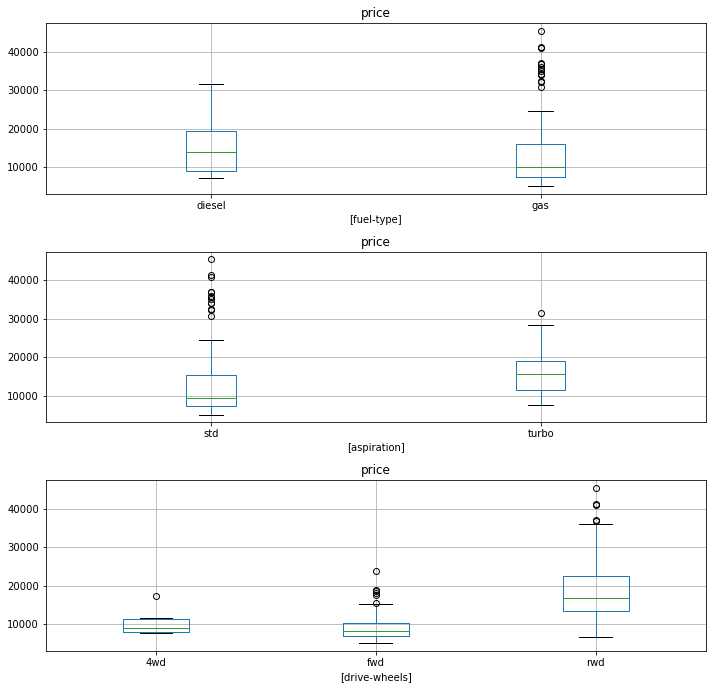

In [187]:
# 3)Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive.
"""
We plot the boxplots of price, to visually compare the distributions of price, 
stratified by each of the 3 variables above.

"""
fig, axs = plt.subplots(3, 1 , figsize=(10,10))
varList = ['fuel-type','aspiration','drive-wheels']
autoDataSlice = autoData.loc[:,['fuel-type','aspiration','drive-wheels','price']].dropna()

for ax ,column in zip(axs,varList):
    autoDataSlice.loc[:,['price', column]].boxplot(by = column, ax = ax)
    ax.set_xticklabels(ax.get_xticklabels())
    plt.tight_layout()
    plt.suptitle('')


# Inference from above plot for price

1- It can be inferred that there is significant difference in the mean prices of cars , when grouped according to fuel type , aspiration and drive-wheels. The same will be tested through t-test as below.

In [188]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
# Perform the t-test for normalized log price stratified by fuel-type at 0.05 significance level
pop_1 = autoDataSlice.loc[autoDataSlice['fuel-type'] == 'diesel' , 'price']
#pop_1 = (pop_1 -pop_1.mean())/pop_1.std()
pop_2 = autoDataSlice.loc[autoDataSlice['fuel-type'] == 'gas' , 'price']
#pop_2 = (pop_2 -pop_2.mean())/pop_2.std()

test1 = t_test(pop_1, pop_2, 0.05)
print('\nThe results of t-test for price stratified by fuel-type are as follows\n')
print( np.round(test1,7))

# Perform the t-test for normalized log price stratified by aspiration at 0.05 significance level
pop_1 = autoDataSlice.loc[autoDataSlice['aspiration'] == 'std' , 'price']
#pop_1 = (pop_1 -pop_1.mean())/pop_1.std()
pop_2 = autoDataSlice.loc[autoDataSlice['aspiration'] == 'turbo' , 'price']
#pop_2 = (pop_2 -pop_2.mean())/pop_2.std()

test2 = t_test(pop_1, pop_2, 0.05)
print('\nThe results of t-test for price stratified by aspiration are as follows\n')
print( np.round(test2,7))

# Perform the t-test for normalized log price stratified by drive-wheels at 0.05 significance level
pop_1 = autoDataSlice.loc[autoDataSlice['drive-wheels'] == 'fwd' , 'price']
#pop_1 = (pop_1 -pop_1.mean())/pop_1.std()
pop_2 = autoDataSlice.loc[autoDataSlice['drive-wheels'] == 'rwd' , 'price']
#pop_2 = (pop_2 -pop_2.mean())/pop_2.std()

test3 = t_test(pop_1, pop_2, 0.05)
print('\nThe results of t-test for price stratified by drive-wheels are as follows\n')
print( np.round(test3,7))


The results of t-test for price stratified by fuel-type are as follows

DegFreedom      23.610874
Difference    2921.741160
Statistic        1.594268
PValue           0.124176
Low95CI       -863.972314
High95CI      6707.454635
dtype: float64

The results of t-test for price stratified by aspiration are as follows

DegFreedom      64.601969
Difference   -3712.623737
Statistic       -3.069326
PValue           0.003135
Low95CI      -6128.622556
High95CI     -1296.624919
dtype: float64

The results of t-test for price stratified by drive-wheels are as follows

DegFreedom       86.907415
Difference   -10512.833672
Statistic        -9.617793
PValue            0.000000
Low95CI      -12685.443331
High95CI      -8340.224014
dtype: float64


# Inference from above t-tests

From all the 3 tests we see that there is no significant difference in prices, based on fuel-type. At a 5 % significance level we can accept the null hypthesis that prices follow same distribution.

Based on aspiration there seems a significant difference in prices as shown by a very low p value of 0.003 beyond the 2.5 % bands

Based on drive-wheels there is a very low p-value , indicating a significant differenc ein prices as shown by by a very low p value of close to zero.

Thus there is significant difference in 2/3 types only & not all 3 as the box plot shows.

We also see that if log price is used , the discerning power of the test is greatly diminished as is the case when normalization is done.
Hence we prefer to use the raw data.

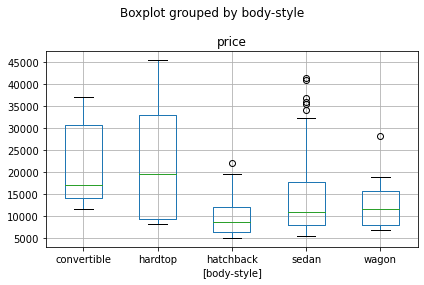


The results for one way anova are as follows

F statistic = 9.12875185470821

P-value = 8.779795237614595e-07
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
convertible   hardtop       318.0    0.9 -10641.9651 11277.9651  False
convertible hatchback -11933.0588 0.0018 -20575.8008 -3290.3168   True
convertible     sedan  -7430.7447 0.1214 -15976.0231  1114.5338  False
convertible     wagon    -9518.54 0.0395 -18744.2753  -292.8047   True
    hardtop hatchback -12251.0588  0.001  -19836.365 -4665.7526   True
    hardtop     sedan  -7748.7447  0.038 -15222.8108  -274.6785   True
    hardtop     wagon    -9836.54 0.0105  -18079.966  -1593.114   True
  hatchback     sedan   4502.3141 0.0016   1271.5527  7733.0756   True
  hatchback     wagon   2414.5188 0.6114  -2332.0828  7161.1205  False
      sedan     wagon  -2087.7953 0.6

In [189]:
# Perform Anova & Tukey HSD test for Price stratified by body-style
from statsmodels.stats.multicomp import pairwise_tukeyhsd


autoBodySlice = autoData.loc[:,['body-style','price']].dropna()

autoBodySlice.loc[:,['price', 'body-style']].boxplot(by = 'body-style')
plt.tight_layout()
plt.show()

df1 = autoBodySlice.loc[autoBodySlice['body-style']== 'convertible', 'price']
df2 = autoBodySlice.loc[autoBodySlice['body-style']== 'hatchback', 'price']
df3 = autoBodySlice.loc[autoBodySlice['body-style']== 'sedan', 'price']
df4 = autoBodySlice.loc[autoBodySlice['body-style']== 'wagon', 'price']
df5 = autoBodySlice.loc[autoBodySlice['body-style']== 'hardtop', 'price']

f_statistic, p_value = ss.f_oneway(df1, df2, df3, df4,df5)
print('\nThe results for one way anova are as follows')
print('\nF statistic = ' + str(f_statistic))
print('\nP-value = ' + str(p_value))


Tukey_HSD = pairwise_tukeyhsd(autoBodySlice['price'], autoBodySlice['body-style'])
print(Tukey_HSD)

# Inference from  ANOVA & Tukey HSD test

Based on the results of the Anova , we get a very low p value , which means that there exists at least one group which is different from the rest.

If we perform the pairwise Tukey HSD test , as when in above table , it identifies pairs which are significantly different from each other(where reject = True)

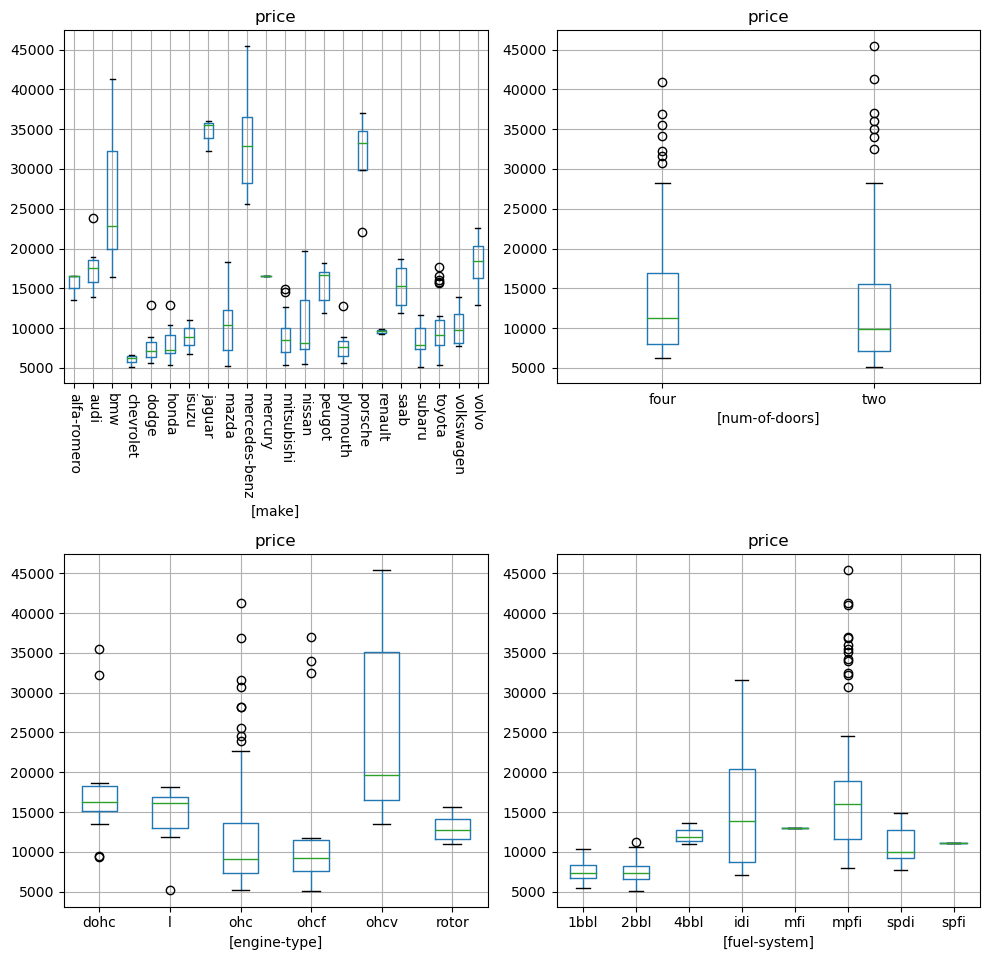

In [190]:
"""
In below section we first draw the box plots of price conditioned by 4 variables: 
1) make
2) num-of-doors
3) engine-type
4) fuel-system
Followed by that we perform the Anova & Tukey HSD for price , grouped by each variable.
"""
columns = ['price','make','num-of-doors','engine-type','fuel-system']
autoLastSlice= autoData.loc[:,columns].dropna()
autoLastSlice = autoLastSlice.loc[autoLastSlice['num-of-doors'] != '?']
fig,ax = plt.subplots(2,2,figsize=(10,10), dpi= 100)

autoLastSlice.loc[:,['price', 'make']].boxplot(by = 'make', ax = ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=270)

autoLastSlice.loc[:,['price', 'num-of-doors']].boxplot(by = 'num-of-doors', ax = ax[0,1])

autoLastSlice.loc[:,['price', 'engine-type']].boxplot(by = 'engine-type', ax = ax[1,0])

autoLastSlice.loc[:,['price', 'fuel-system']].boxplot(by = 'fuel-system', ax = ax[1,1])

plt.tight_layout()
plt.suptitle('')
plt.show()

In [191]:
"""
Below we perform Tukey HSD for 3 /4 variables above.
Since makes are too many with obvious variations, we select the other variables.
"""
#Perform Anova for num-of-doors
df1 = autoLastSlice.loc[autoLastSlice['num-of-doors']== 'two', 'price']
df2 = autoLastSlice.loc[autoLastSlice['num-of-doors']== 'four', 'price']
f_statistic, p_value = ss.f_oneway(df1, df2)
print('\nThe results for one way anova for # of doors are as follows')
print('\nSince P value is high we infer that there is no significant difference in prices based on no of doors')
print('\nF statistic = ' + str(f_statistic))
print('\nP-value = ' + str(p_value))

#Perform Anova for engine-type
df1 = autoLastSlice.loc[autoLastSlice['engine-type']== 'dohc', 'price']
df2 = autoLastSlice.loc[autoLastSlice['engine-type']== 'l', 'price']
df3 = autoLastSlice.loc[autoLastSlice['engine-type']== 'ohc', 'price']
df4 = autoLastSlice.loc[autoLastSlice['engine-type']== 'ohcf', 'price']
df5 = autoLastSlice.loc[autoLastSlice['engine-type']== 'ohcv', 'price']
df6 = autoLastSlice.loc[autoLastSlice['engine-type']== 'rotor', 'price']
f_statistic, p_value = ss.f_oneway(df1, df2,df3,df4,df5,df6)
print('\nThe results for one way anova for engine-type are as follows')
print('\nSince P value is low we infer that there is significant difference in at least one pair of prices based on engine type')
print('\nF statistic = ' + str(f_statistic))
print('\nP-value = ' + str(p_value))

#Perform Anova for engine-type
df1 = autoLastSlice.loc[autoLastSlice['fuel-system']== '1bbl', 'price']
df2 = autoLastSlice.loc[autoLastSlice['fuel-system']== '2bbl', 'price']
df3 = autoLastSlice.loc[autoLastSlice['fuel-system']== '4bbl', 'price']
df4 = autoLastSlice.loc[autoLastSlice['fuel-system']== 'idi', 'price']
df5 = autoLastSlice.loc[autoLastSlice['fuel-system']== 'mfi', 'price']
df6 = autoLastSlice.loc[autoLastSlice['fuel-system']== 'mpfi', 'price']
df7 = autoLastSlice.loc[autoLastSlice['fuel-system']== 'spdi', 'price']
df8 = autoLastSlice.loc[autoLastSlice['fuel-system']== 'spfi', 'price']

f_statistic, p_value = ss.f_oneway(df1, df2,df3,df4,df5,df6,df7,df8)
print('\nThe results for one way anova for fuel-system are as follows')
print('\nSince P value is low we infer that there is significant difference in at least one pair of prices based on fuel system')
print('\nF statistic = ' + str(f_statistic))
print('\nP-value = ' + str(p_value))

Tukey_HSD = pairwise_tukeyhsd(autoLastSlice['price'], autoLastSlice['engine-type'])
print('\nTukey HSD test based on engine-type as conditioning var\n')
print(Tukey_HSD)

Tukey_HSD = pairwise_tukeyhsd(autoLastSlice['price'], autoLastSlice['fuel-system'])
print('\nTukey HSD test based on fuel-system as conditioning var\n')
print(Tukey_HSD)




The results for one way anova for # of doors are as follows

Since P value is high we infer that there is no significant difference in prices based on no of doors

F statistic = 0.427479119155265

P-value = 0.5139909636776467

The results for one way anova for engine-type are as follows

Since P value is low we infer that there is significant difference in at least one pair of prices based on engine type

F statistic = 9.684874280029756

P-value = 2.8787621872030174e-08

The results for one way anova for fuel-system are as follows

Since P value is low we infer that there is significant difference in at least one pair of prices based on fuel system

F statistic = 15.347464818914336

P-value = 7.076932772117787e-16

Tukey HSD test based on engine-type as conditioning var

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
  dohc      l  -3488.8333 0.

# Inference from  ANOVA & Tukey HSD test

Based on the above box plots, Anova and Tukey tests we conclude that while price is not significant when stratified by # of doors , it is significant when stratified by fuel system and engine -type.

The pairwise comparisons are given by Tukey HSD test.